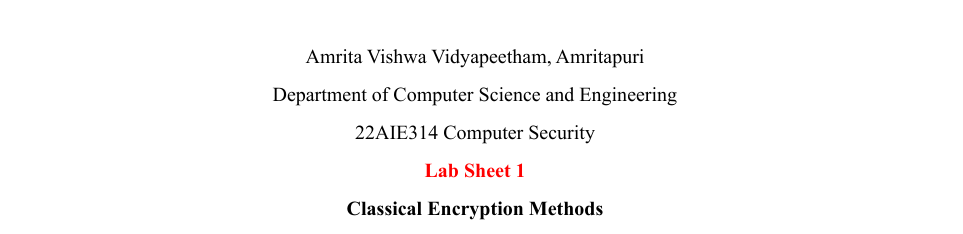

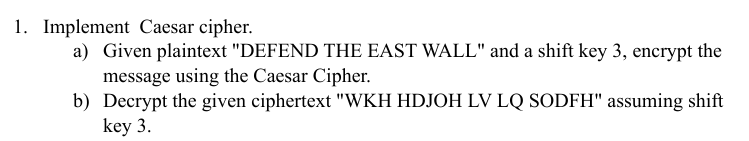

In [ ]:
def CaesarEncrypt(text, key):
  asc = []
  for i in text:
    if i != " ":
     asc.append(ord(i)+key)
    else:
      asc.append(ord(i))
  return "".join(map(chr, asc))

print(CaesarEncrypt("DEFEND THE EAST WALL", 3))

GHIHQG WKH HDVW ZDOO


In [ ]:
def CaesarDecrypt(text,key):
  asc = []
  for i in text:
    if i != " ":
     asc.append(ord(i)-key)
    else:
      asc.append(ord(i))
  return "".join(map(chr, asc))


print(CaesarDecrypt("WKH HDJOH LV LQ SODFH", 3))


THE EAGLE IS IN PLACE


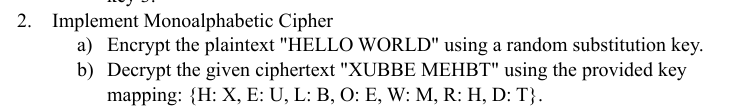

In [ ]:
key = {"H": "X", "E": "U", "L": "B", "O": "E", "W": "M", "R": "H", "D": "T" ," ": " "}

def MEncrypt(Text, key):
  return "".join([key[i] for i in Text])


print(MEncrypt("HELLO WORLD", key))

XUBBE MEHBT


In [ ]:
def MDecrypt(text,key):
  x = []
  [[x.append(k) for k, j in key.items() if j==i] for i in text]
  return ''.join(x)

print(MDecrypt("XUBBE MEHBT", key))

HELLO WORLD


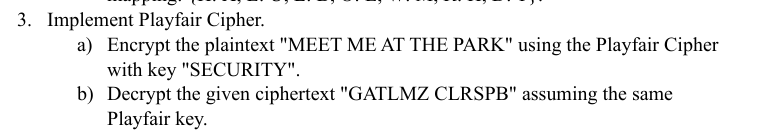

In [22]:
import numpy as np


In [16]:
def gen_key_mat(key):
  import numpy as np
  key.replace('J', 'I')
  mat = np.array(['#']*25)
  ind = 0
  for i in key:
    mat[ind] = i
    ind+=1
  mat[ind:] = sorted(list(set([chr(i) for i in range(65, 91)]) - set(key) - set('J')))
  mat.resize((5, 5))
  return mat


def playfair(text, keymat):
  if " " in text:
    return ' '.join([playfair(i, keymat) for i in text.split(' ')])
  if len(text) == 1:
    if text != 'X':
      text+='X'
    elif text !='Y':
      text+='Y'
    else:
      text+='Z'
    l1, l2 = np.where(keymat==text[0]), np.where(keymat==text[1])
    if l1[0] == l2[0]:
      return keymat[(l1[0]+1)%5, l1[1]][0]+keymat[(l2[0]+1)%5, l2[1]][0]
    elif l1[1] == l2[1]:
      return keymat[l1[0], (l1[1]+1)%5][0]+keymat[l2[0], (l2[1]+1)%5][0]
    elif l1[0]<l2[0]:
      return keymat[l1[0], l2[1]][0]+keymat[l2[0], l1[1]][0]
    else:
      return keymat[l2[0], l1[1]][0]+keymat[l1[0], l2[1]][0]
  else:
    # print(text)
    cipher = ''
    count, n = 0, len(text)
    l = []
    if n%2!=0:
      if text[-1]!='X':
        text+='X'
      elif text[-1]!='Y':
        text+='Y'
      else:
        text+='Z'
    while count <n:
      if text[count] != text[count+1]:
        l.append(text[count:count+2])
        count+=2
      elif text[count]!='X':
        l.append(text[count]+'X')
        count+=1
      elif text[count]!='Y':
        l.append(text[count]+'Y')
        count+=1
      else:
        l.append(text[count]+'Z')
        count+=1

    text=''.join(l)
    for i in range(1, len(text), 2):
      l1, l2 = np.where(keymat==text[i-1]), np.where(keymat==text[i])
      l1, l2 = [l1[0][0], l1[1][0]], [l2[0][0], l2[1][0]]
      # print('cipher', cipher, 'c1', text[i-1], 'c2', text[i], 'l1', l1, 'l2', l2)
      if l1[0] == l2[0]:
        # print('cond', 1)
        cipher+= keymat[l1[0], (l1[1]+1)%5][0]+keymat[l2[0], (l2[1]+1)%5][0]
      elif l1[1] == l2[1]:
        # print('cond', 2)
        cipher+= keymat[(l1[0]+1)%5, l1[1]][0]+keymat[(l2[0]+1)%5, l2[1]][0]
      elif l1[0]<l2[0]:
        # print('cond', 3)
        cipher+= keymat[l1[0], l2[1]][0]+keymat[l2[0], l1[1]][0]
      else:
        # print('cond', 4)
        cipher+= keymat[l2[0], l1[1]][0]+keymat[l1[0], l2[1]][0]
    # print('final', cipher)
    return cipher


In [17]:
text = "MEET ME AT THE PARK"
key = "SECURITY"

keymat = gen_key_mat(key)
print(keymat)
cipher = playfair(text, keymat)
print("Encoded : ",cipher)

[['S' 'E' 'C' 'U' 'R']
 ['I' 'T' 'Y' 'A' 'B']
 ['D' 'F' 'G' 'H' 'K']
 ['L' 'M' 'N' 'O' 'P']
 ['Q' 'V' 'W' 'X' 'Z']]
Encoded :  VTTF VT BY AFUV BOBP


In [19]:
def PlayFairDecrypt(text, keymat):
  if ' ' in text:
    return ' '.join([PlayFairDecrypt(i, keymat) for i in text.split(' ')])
  else:
    import numpy as np
    decipher = ''
    for i in range(1, len(text), 2):
      l1, l2 = np.where(keymat==text[i-1]), np.where(keymat==text[i])
      l1, l2 = [l1[0][0], l1[1][0]], [l2[0][0], l2[1][0]]
      if l1[0] == l2[0]:
        decipher+= keymat[l1[0], (l1[1]-1)%5][0]+keymat[l2[0], (l2[1]-1)%5][0]
      elif l1[1] == l2[1]:
        decipher+= keymat[(l1[0]-1)%5, l1[1]][0]+keymat[(l2[0]-1)%5, l2[1]][0]
      elif l1[0]<l2[0]:
        decipher+= keymat[l1[0], l2[1]][0]+keymat[l2[0], l1[1]][0]
      else:
        decipher+= keymat[l1[0], l2[1]][0]+keymat[l2[0], l1[1]][0]
    return decipher



In [21]:
cipher = 'GATLMZ CLRSPB'
print('Cipher: ', cipher)
print('Key: ', key)
print("Key Diagram:\n", keymat)
text = PlayFairDecrypt(cipher, keymat)
print('Decrypted : ', text)

Cipher:  GATLMZ CLRSPB
Key:  SECURITY
Key Diagram:
 [['S' 'E' 'C' 'U' 'R']
 ['I' 'T' 'Y' 'A' 'B']
 ['D' 'F' 'G' 'H' 'K']
 ['L' 'M' 'N' 'O' 'P']
 ['Q' 'V' 'W' 'X' 'Z']]
Decrypted :  HYIMPV SNURKR
